# Spectral Clustering

<hr>

**Steiner Trees**<br>
What is the *smallest* sub-network that connects all of the nodes that are of interest? Smallest refers to the sum of all edge weights in the sub-network. An example problem can be a weighted graph where each node is a city and the weighted edges are the costs to build a train connection to each node - then if the goal is to minimize the costs while ensuring that all cities are connected then we should find the **minimum spanning tree** (MST) of the graph, which can be done in polynomial time.

However, if the goal is to connect just a few cities of interest at minimum costs then the goal is to find the **Steiner tree** of the graph, which is a NP-complete problem. A Steiner tree can be approximated by using the MST by discarding all non-interest nodes and the weight is limited to 2x of the optimal Steiner tree.

<img alt="Steiner Tree" src="assets/steiner_tree.jpg" width="300">

[Reference paper](https://www.biorxiv.org/content/10.1101/057828v1), on given certain genes that are known to cause a certain disease, what are the other candidate genes that may cause the disease?


<hr>

**Community Detection / Bipartite graphs**<br>
Given an adjacency matrix, $A$, where each row corresponds to persons and columns are crimes, the co-offending network has (weighted) adjacency matrix $AA^T$ and similarly a network of crimes is based on $A^T A$. It can also be represented by a bipartite graph, $
\begin{bmatrix}
0 & A\\
A^T & 0
\end{bmatrix}
$

To detect communities in these networks, we can detect subsets of nodes that are more densely connected between each other in the network than outside the community.

<hr>

# Basic code
A `minimal, reproducible example`

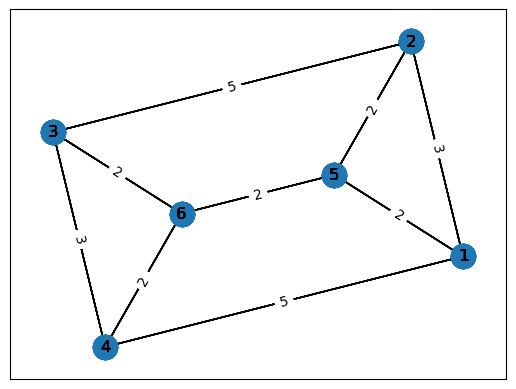

In [14]:
# Find the Steiner Tree from this network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A = np.array([[0, 3, 0, 5, 2, 0], 
    [3, 0, 5, 0, 2, 0], 
    [0, 5, 0, 3, 0, 2], 
    [5, 0, 3, 0, 0, 2], 
    [2, 2, 0, 0, 0, 2], 
    [0, 0, 2, 2, 2, 0]])

graph = nx.from_numpy_matrix(A, create_using=nx.Graph)
pos   = nx.kamada_kawai_layout(graph)

nx.draw_networkx(graph, pos, labels={i: str(i+1) for i in range(len(A))})
nx.draw_networkx_edge_labels(graph,pos,edge_labels=nx.get_edge_attributes(graph,'weight'))

plt.show()

In [41]:
# Approximate the Steiner tree using the graph distance matrix
# What is the sum of all edge weights in the minimal spanning tree?

from networkx.algorithms.tree.mst import minimum_spanning_tree as mst

D = np.array(
    [[0,3,6,5],
    [3,0,5,6],
    [6,5,0,3],
    [5,6,0,3]]
)
D = nx.from_numpy_matrix(D, create_using = nx.Graph)
mst_D = mst(D)
mst_D.size(weight = 'weight')

11.0